In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [302]:
dataframe=pd.read_csv('train.csv')
dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [303]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [304]:
dataframe.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [305]:
dataframe.shape

(891, 12)

In [306]:
q1=dataframe["Age"].quantile(0.25)
q3=dataframe["Age"].quantile(0.75)
xyz=q3-q1
lower_range=q1-(1.5*xyz)
upper_range=q3+(1.5*xyz)
outliers=len(dataframe[(dataframe['Age']<lower_range)| (dataframe['Age']>upper_range)])
print("Number Of rows having Outliers : ",outliers)

Number Of rows having Outliers :  11


In [307]:
q1=dataframe["Age"].quantile(0.25)
q3=dataframe["Age"].quantile(0.75)
xyz=q3-q1
lower_range=q1-(1.5*xyz)
upper_range=q3+(1.5*xyz)
dataframe=dataframe[(dataframe['Age'] >= lower_range) & (dataframe['Age'] <= upper_range)]

In [308]:
q1=dataframe["Age"].quantile(0.25)
q3=dataframe["Age"].quantile(0.75)
xyz=q3-q1
lower_range=q1-(1.5*xyz)
upper_range=q3+(1.5*xyz)
outliers=len(dataframe[(dataframe['Age']<lower_range)| (dataframe['Age']>upper_range)])
print("Number Of rows having Outliers : ",outliers)

Number Of rows having Outliers :  0


In [309]:
dataframe['Age']=dataframe['Age'].fillna(dataframe['Age'].mean())
dataframe.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          523
Embarked         2
dtype: int64

In [310]:
q1=dataframe["Age"].quantile(0.25)
q3=dataframe["Age"].quantile(0.75)
xyz=q3-q1
lower_range=q1-(1.5*xyz)
upper_range=q3+(1.5*xyz)
outliers=len(dataframe[(dataframe['Age']<lower_range)| (dataframe['Age']>upper_range)])
print("Number Of rows having Outliers : ",outliers)

Number Of rows having Outliers :  0


In [311]:
dataframe=dataframe.drop(columns='Cabin',axis=1)


In [312]:
print(dataframe['Embarked'].mode()[0])

S


In [313]:
dataframe['Embarked'].fillna(dataframe['Embarked'].mode()[0],inplace=True)

In [314]:
dataframe.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [315]:
dataframe.shape

(703, 11)

In [316]:
dataframe.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000
mean,449.290185,0.411095,2.244666,29.072077,0.519203,0.435277,34.785093
std,258.604497,0.492383,0.835397,13.728478,0.934836,0.858015,53.255433
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,444.000000,0.000000,3.000000,28.000000,0.000000,0.000000,15.741700
75%,678.500000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,64.000000,5.000000,6.000000,512.329200


In [317]:
dataframe['Survived'].value_counts()

0    414
1    289
Name: Survived, dtype: int64

In [318]:
sns.set()

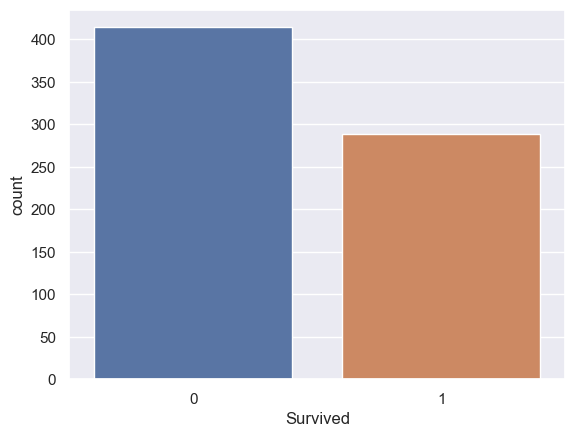

In [319]:
sns.countplot(x='Survived', data=dataframe)
plt.show()

male      442
female    261
Name: Sex, dtype: int64


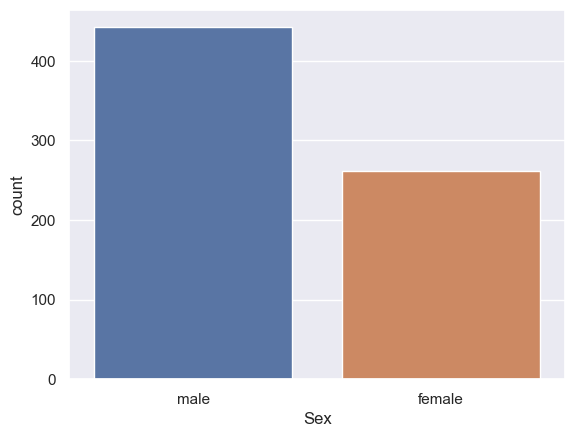

In [320]:
print(dataframe['Sex'].value_counts())
sns.countplot(x='Sex', data=dataframe)
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

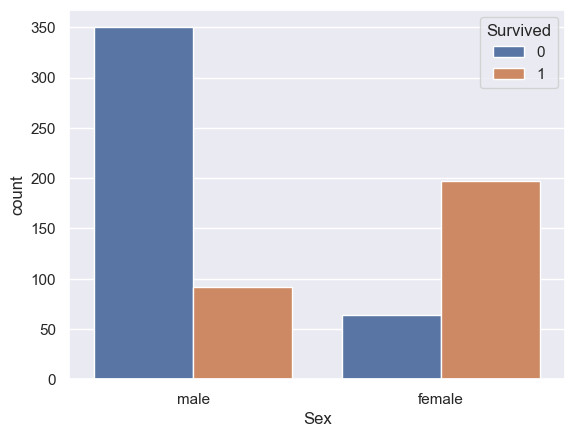

In [321]:
sns.countplot(x='Sex',hue='Survived',data=dataframe)

<Axes: xlabel='Pclass', ylabel='count'>

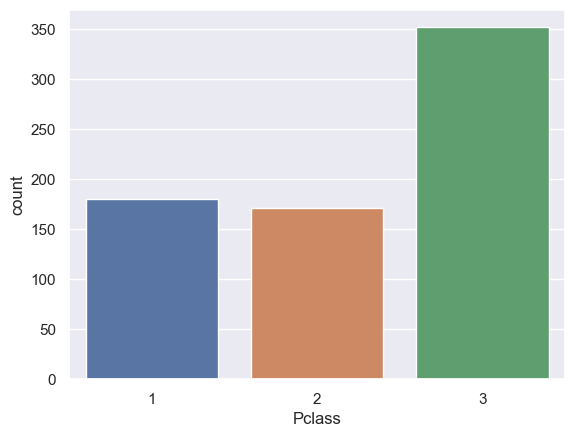

In [322]:
sns.countplot(x='Pclass',data=dataframe)

<Axes: xlabel='Pclass', ylabel='count'>

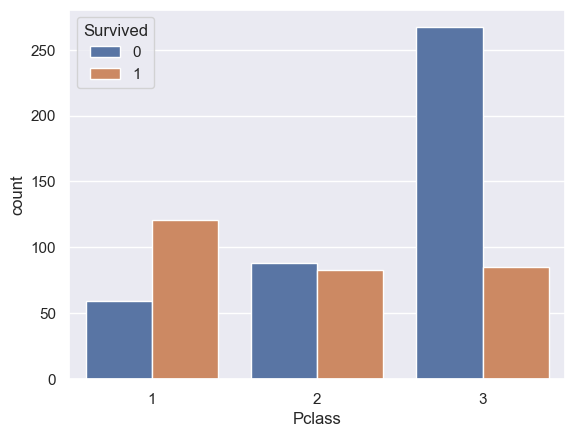

In [323]:
sns.countplot(x='Pclass',hue='Survived',data=dataframe)

<Axes: xlabel='Embarked', ylabel='count'>

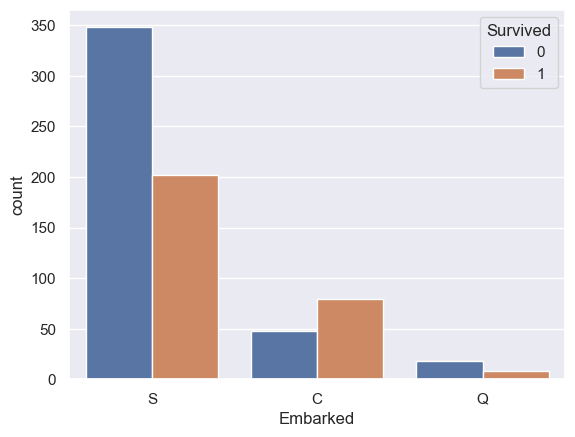

In [324]:
sns.countplot(x='Embarked',hue='Survived',data=dataframe)

<Axes: xlabel='SibSp', ylabel='count'>

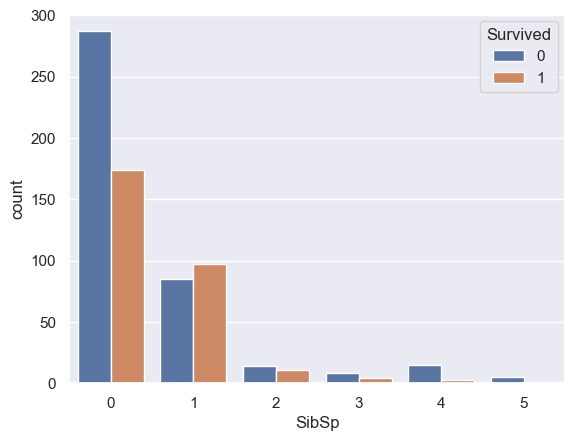

In [325]:
sns.countplot(x='SibSp',hue='Survived',data=dataframe)

<Axes: xlabel='Parch', ylabel='count'>

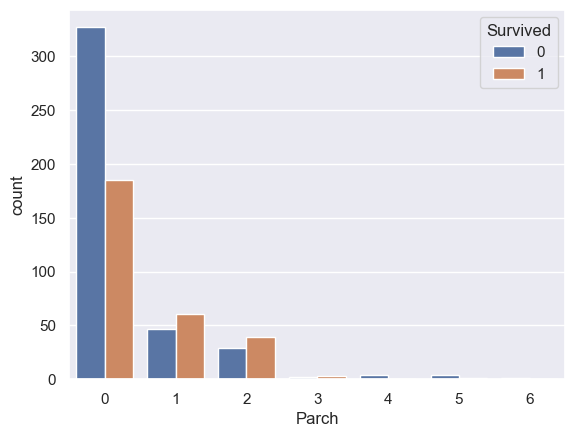

In [326]:
sns.countplot(x='Parch',hue='Survived',data=dataframe)

In [327]:
dataframe.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'Q':2,'C':1}},inplace=True)

In [328]:
dataframe.drop(columns=['PassengerId','Name','Ticket'],inplace=True)
x=dataframe.drop(columns='Survived',axis=1)
y=dataframe['Survived']

In [329]:
x.drop(columns=['Fare'],axis=1,inplace=True)

In [330]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [331]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [332]:
model=LogisticRegression()

In [333]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [334]:
x_pred=model.predict(xtrain)

In [335]:
x_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [336]:
accuracy=accuracy_score(ytrain,x_pred)

In [337]:
accuracy

0.8167259786476868

In [338]:
x_test_pred=model.predict(xtest)

In [339]:
x_test_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

In [340]:
test_accuracy=accuracy_score(ytest,x_test_pred)

In [341]:
test_accuracy

0.7588652482269503

In [342]:
test=pd.read_csv('test.csv')

In [343]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [344]:
test.drop(columns=['Name','Ticket','Cabin','Fare'],inplace=True)

In [345]:
test.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'Q':2,'C':1}},inplace=True)

In [346]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Embarked     418 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 23.0 KB


In [347]:
test['Age']=test['Age'].fillna(test['Age'].mean())
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [348]:
df=test['PassengerId']
test.drop(columns='PassengerId',axis=1,inplace=True)

In [349]:
test_pred=model.predict(test)

In [350]:
test_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [351]:
test_pred.shape

(418,)

In [352]:
df

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [353]:
predictions_df = pd.DataFrame({
    "PassengerId": df,
    "Survived": test_pred
})

In [354]:
predictions_df.to_csv("test_predictions.csv", index=False)

In [355]:
dff=pd.read_csv('test_predictions.csv')

In [356]:
dff

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [357]:
dfff=pd.read_csv('gender_submission.csv')
dfff

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
